# Perception of Acoustic Cues of Voiced Coronal Stops by Spanish-English Bilinguals

### Description:

The following script provides the analysis and data used for the study entitled Perception of Acoustic Cues of Voiced Coronal Stops by Spanish-English Bilinguals conducted by __[Ernesto Gutiérrez Topete](https://sites.google.com/berkeley.edu/egutierrez)__ (UC Berkeley) and __[Jesus Duarte](https://www.spanport.ucla.edu/person/jesus-duarte/)__ (UC Los Angeles). This script was made available prior to the conference presentation of this research study in the 97th Annual Meeting of the Linguistic Society of America (2023, Denver, CO). Nonetheless, this script may be modified following the feedback and suggestions received from colleagues during this meeting or others.

The study explored Spanish-English bilinguals' perceptual discrimination of voiced coronal stop stimuli that were manipulated in regard to their voice onset time (VOT) and place of articulation (POA), in accordance to the acoustic properties related to each language: Spanish and English. The analysis included a regularization method that is intended to decrease the error reported by the statistical model in order to accommodate to a data set with a large number of variables.

Refer to the files named `data/variable_name_biling.csv` and `data/variable_name_monoling.csv` to obtain more information about the variable names and the topic or survey question they represent in the bilingual and monolingual data sets.

***

**This script was prepared by Ernesto Gutiérrez Topete. You may contact him at ernesto.gutierrez@berkeley.edu.**

## Bilingual Data Processing

In [1]:
## import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # create plots with computer modern font style
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [2]:
## open the (previously cleaned) bilingual data

# the following data set contains 4800 rows, one for each response to the critical stimuli (48 total) by all
# 100 bilingual participants.

df_bilingual = pd.read_csv('data/bilingual.csv')  # upload data set
df_bilingual.fillna('', inplace=True)  # replace blank cells with an empty string
df_bilingual['accents_coded']=df_bilingual['accents_coded'].str.split(',')  # split accent codes into a list

# display the dataframe
display(df_bilingual)

,subject,age,education,age_english,age_spanish,comfortable_english,comfortable_spanish,classes_english,classes_spanish,residency_english,...,sound_native_spanish,native_speaker_english,native_speaker_spanish,accents_spanish,accents_english,dominance_score,accents_coded,device,trial,response
0,S001,25,High school,0,0,0,0,4,0,20,...,3,4,3,1,5,89.458,[],Middle price earphones (e.g. those that come w...,ad_a_pps_cr,1 and 2
1,S002,39,Some college,0,12,0,15,12,8,20,...,3,6,2,4,1,142.302,[spa_accented_am_eng],High price earphones or headphones (e.g. noise...,ad_a_pps_cr,1 and 2
2,S003,27,Associates,0,0,4,4,15,0,20,...,5,6,5,1,2,60.668,[spa_accented_am_eng],Middle price earphones (e.g. those that come w...,ad_a_pps_cr,1 and 2
3,S004,38,"College (B.A., B.S.)",0,4,0,4,16,0,20,...,4,6,3,3,4,79.556,"[spa_accented_am_eng, eng_accented_mex_spa]",High price earphones or headphones (e.g. noise...,ad_a_pps_cr,1 and 2
4,S005,48,Masters,20,8,21,6,20,6,20,...,2,6,2,2,5,118.230,[],Computer/laptop speakers,ad_a_pps_cr,1 and 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,S096,35,Masters,20,17,20,18,20,16,20,...,6,6,6,4,5,22.884,[],High price earphones or headphones (e.g. noise...,sld_a_aad_cr,1 and 2
4796,S097,35,Masters,20,19,20,18,20,19,20,...,6,6,4,5,5,38.050,[],High price earphones or headphones (e.g. noise...,sld_a_aad_cr,1 and 2
4797,S098,35,Masters,20,20,20,19,20,18,20,...,4,6,4,4,5,40.046,[],High price earphones or headphones (e.g. noise...,sld_a_aad_cr,1 and 2
4798,S099,36,"College (B.A., B.S.)",0,5,2,8,5,15,20,...,5,6,4,4,5,41.864,[spa_accented_am_eng],High price earphones or headphones (e.g. noise...,sld_a_aad_cr,2 and 3


#### Description of "trial" column

The dataframe contains a column called "tiral", which includes four pieces of information that relate to the manipulation of the observation in question: 
        
* Constant variable (non-manipulated)*, 
* Vowel, 
* Order**, and 
* Stimulus type***.
    
    
*For constant variable, the non-manipulated variable refers to the articulation/acoustic parameter that was selected. If VOT, then the VOT productions of all stimuli within that trial were maintained as either prevoiced or short-lagged. If POA, then the POA of all stimuli within that trial were maintained as either dental or alveolar. That is, for each variable, the production was either Spanish- or Englilsh-like. For each stimulus, the constant variable was not manipulated, but the other variable was, and vice versa.
    
\**For order, each manipulated variable was assigned a letter (A) o (B) and the orders were counterbalanced in order to ensure that each manipulated variable could be found either at the beginning or the end of the trial set-up in the AXB task.
    
\*\**For stimulus type, the non-critical observations (ie, fillers) have already been removed from the data set. Thus, only critical stimuli (ending in 'cr') are present in this dataframe.
    
The levels for each of the four pieces of information are below:
    
* Constant variable:
    - VOT (ie, pd, sld)
    - POA (ie, dd, ad)
        
* Vowel:
    - /i/
    - /a/
    - /u/
        
* Order:
    - AAB
    - ABB
    - BAA
    - BBA
        
* Stimulus type:
    - critical
    - non-critical

In [3]:
def trial_info(row):
    
    '''
    This function takes a row (an observation) from the dataframe as the argument and selects the 'trial' column, 
    which includes information about the stimulus that was discriminated by the participant. The function then 
    splits the string into and creates new rows for the four pieces of information contained: constant variable, 
    vowel, order, and stimulus type.
    
    The function also adds a column called 'answer' (ie, correct answer) and uses the column 'response' (ie, 
    participant's response), in order to determine the output for a third column called 'accuracy' (0 vs 1, ie, 
    'incorrect' vs 'correct') for each observation.
    '''
    
    trial_vars = row['trial'].split("_")  # split four pieces of info: constant variable, vowel, order, stimulus type
    row['vowel'] = trial_vars[1]  # populate vowel column: /i a u/
    if ((trial_vars[0] == 'ad') or (trial_vars[0] == 'dd')):
        row['constant_spec'] = trial_vars[0]  # populate constant (specific) variable column: alveolar vs dental
        row['constant_gen'] = 'poa'  # populate constant (general) variable column: poa
    elif ((trial_vars[0] == 'pd') or (trial_vars[0] == 'sld')):
        row['constant_spec'] = trial_vars[0]  # populate constant (specific) variable column: prevoiced vs shortLag
        row['constant_gen'] = 'vot'  # populate constant (general) variable column: vot
    if trial_vars[2][0] == trial_vars[2][1]:
        row['answer'] = '1 and 2'  # populate (correct) answer column (determined by 'order' information)
        if ((trial_vars[2][0] == 'p') or (trial_vars[2][0] == 'd')):
            row['order'] = 'AAB'  # populate order column
        else:
            row['order'] = 'BBA'  # populate order column
    else:
        row['answer'] = "2 and 3"  # populate (correct) answer column (determined by 'order' information)
        if ((trial_vars[2][0] == 'p') or (trial_vars[2][0] == 'd')):
            row['order'] = 'ABB'  # populate order column
        else:
            row['order'] = 'BAA'  # populate order column
    if row['response'] == row['answer']:
        row['accuracy'] = 1  # populate accuacy column (determined by 'answer' and 'response' columns)
    else:
        row['accuracy'] = 0  # populate accuacy column (determined by 'answer' and 'response' columns)
    return row

In [4]:
## create columns with trial info

# execute the trial info function on the bilingual dataframe
df_bilingual = df_bilingual.apply(lambda row: trial_info(row), axis=1)

display(df_bilingual)

,accents_coded,accents_english,accents_spanish,accuracy,age,age_english,age_spanish,answer,classes_english,classes_spanish,...,sound_native_english,sound_native_spanish,subject,talk_yourself_english,talk_yourself_other,talk_yourself_spanish,trial,vowel,work_english,work_spanish
0,[],5,1,1,25,0,0,1 and 2,4,0,...,5,3,S001,1.0,0.0,0.0,ad_a_pps_cr,a,7,0
1,[spa_accented_am_eng],1,4,1,39,0,12,1 and 2,12,8,...,6,3,S002,1.0,0.0,0.0,ad_a_pps_cr,a,20,8
2,[spa_accented_am_eng],2,1,1,27,0,0,1 and 2,15,0,...,6,5,S003,0.9,0.0,0.1,ad_a_pps_cr,a,2,0
3,"[spa_accented_am_eng, eng_accented_mex_spa]",4,3,1,38,0,4,1 and 2,16,0,...,6,4,S004,1.0,0.0,0.0,ad_a_pps_cr,a,17,17
4,[],5,2,1,48,20,8,1 and 2,20,6,...,6,2,S005,1.0,0.1,0.1,ad_a_pps_cr,a,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,[],5,4,1,35,20,17,1 and 2,20,16,...,6,6,S096,1.0,0.0,0.9,sld_a_aad_cr,a,20,18
4796,[],5,5,1,35,20,19,1 and 2,20,19,...,6,6,S097,1.0,0.0,0.8,sld_a_aad_cr,a,20,18
4797,[],5,4,1,35,20,20,1 and 2,20,18,...,6,4,S098,1.0,0.0,1.0,sld_a_aad_cr,a,20,17
4798,[spa_accented_am_eng],5,4,0,36,0,5,1 and 2,5,15,...,6,5,S099,0.9,0.2,0.7,sld_a_aad_cr,a,20,20


In [5]:
## drop superfluous columns

# remove the columns 'trial', 'response', and 'answer' from the bilingual dataframe
df_bilingual.drop(['trial', 'response', 'answer'], axis=1, inplace=True)

display(df_bilingual)

,accents_coded,accents_english,accents_spanish,accuracy,age,age_english,age_spanish,classes_english,classes_spanish,comfortable_english,...,residency_spanish,sound_native_english,sound_native_spanish,subject,talk_yourself_english,talk_yourself_other,talk_yourself_spanish,vowel,work_english,work_spanish
0,[],5,1,1,25,0,0,4,0,0,...,4,5,3,S001,1.0,0.0,0.0,a,7,0
1,[spa_accented_am_eng],1,4,1,39,0,12,12,8,0,...,0,6,3,S002,1.0,0.0,0.0,a,20,8
2,[spa_accented_am_eng],2,1,1,27,0,0,15,0,4,...,20,6,5,S003,0.9,0.0,0.1,a,2,0
3,"[spa_accented_am_eng, eng_accented_mex_spa]",4,3,1,38,0,4,16,0,0,...,20,6,4,S004,1.0,0.0,0.0,a,17,17
4,[],5,2,1,48,20,8,20,6,21,...,7,6,2,S005,1.0,0.1,0.1,a,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,[],5,4,1,35,20,17,20,16,20,...,16,6,6,S096,1.0,0.0,0.9,a,20,18
4796,[],5,5,1,35,20,19,20,19,20,...,16,6,6,S097,1.0,0.0,0.8,a,20,18
4797,[],5,4,1,35,20,20,20,18,20,...,18,6,4,S098,1.0,0.0,1.0,a,20,17
4798,[spa_accented_am_eng],5,4,0,36,0,5,5,15,2,...,20,6,5,S099,0.9,0.2,0.7,a,20,20


In [6]:
## obtain and display accuracy totals out of 48 total stimuli for the group and for individuals

biling_acc_dict = {}
for subject in df_bilingual.subject.unique():
    subj_acc = df_bilingual.loc[df_bilingual['subject'] == subject, 'accuracy'].sum()
    biling_acc_dict.update({subject:subj_acc})

# print average accuracy for bilingual participants
print('Bilingual average accuracy:',round(sum(biling_acc_dict.values())/48,2),'%')


# print accuracy for each individual participant
print('\nCorrect responses for each subject:\n')

for key, value in biling_acc_dict.items():
    print(key+':', value)

Bilingual average accuracy: 56.85 %

Correct responses for each subject:

S001: 27
S002: 27
S003: 23
S004: 27
S005: 33
S006: 25
S007: 26
S008: 32
S009: 25
S010: 27
S011: 30
S012: 27
S013: 31
S014: 21
S015: 25
S016: 33
S017: 27
S018: 24
S019: 27
S020: 30
S021: 26
S022: 27
S023: 24
S024: 28
S025: 25
S026: 26
S027: 26
S028: 29
S029: 34
S030: 24
S031: 35
S032: 23
S033: 24
S034: 22
S035: 22
S036: 28
S037: 28
S038: 29
S039: 31
S040: 28
S041: 30
S042: 28
S043: 29
S044: 25
S045: 27
S046: 34
S047: 24
S048: 27
S049: 27
S050: 28
S051: 33
S052: 27
S053: 28
S054: 27
S055: 27
S056: 25
S057: 28
S058: 31
S059: 24
S060: 26
S061: 27
S062: 30
S063: 24
S064: 24
S065: 26
S066: 27
S067: 30
S068: 27
S069: 24
S070: 27
S071: 27
S072: 29
S073: 24
S074: 27
S075: 23
S076: 27
S077: 23
S078: 23
S079: 27
S080: 27
S081: 26
S082: 32
S083: 23
S084: 40
S085: 25
S086: 28
S087: 29
S088: 31
S089: 21
S090: 34
S091: 28
S092: 33
S093: 24
S094: 30
S095: 25
S096: 29
S097: 28
S098: 28
S099: 23
S100: 28


minimum: 43.75
maximum: 83.33333333333334
subjects below chance: 11


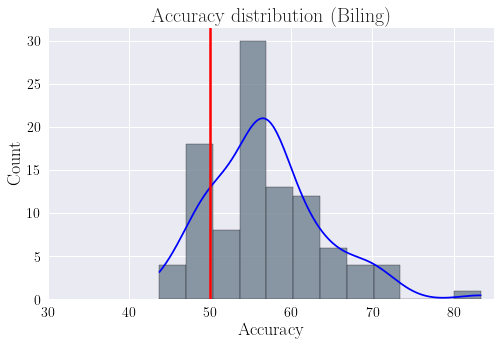

In [7]:
## plot distribution of accuracy data for bilingual participants

biling_acc_list = [acc_score/0.48 for acc_score in biling_acc_dict.values()]

print("minimum:", min(biling_acc_list))
print("maximum:", max(biling_acc_list))
print("subjects below chance:", len([prcnt for prcnt in biling_acc_list if prcnt < 50]))

# plot
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(x=biling_acc_list, 
                 color='slategray', 
                 kde=True, 
                 alpha=0.8).lines[0].set_color('b')

ax.set_xlim(30,85)

plt.axvline(50, color = "red", lw=2.5)
plt.title("Accuracy distribution (Biling)", fontsize=20)
plt.xlabel("Accuracy", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)

# save figure
# plt.savefig('images/biling_acc.pdf', dpi=300)  # uncomment to save plot

plt.show(ax)

## Bilingual Analysis

#### Bilingual Data Preparation

In [8]:
## import libraries

from sklearn.linear_model import LogisticRegression  # logistic regression algorithm
from sklearn.model_selection import train_test_split  # data spliting algorithm
from sklearn.model_selection import GridSearchCV  # hyperparameter tuning algorithm

In [9]:
## split data

# create y series (ie, label or dependent variable) and X dataframe (ie, independent variables)
y = df_bilingual['accuracy']
X = df_bilingual.drop(['accuracy'], axis=1)  # drop the dependent variable from dataframe

# get dummies for categorical variables
X = pd.get_dummies(X, drop_first=True, columns=['constant_gen',
                                                'constant_spec',
                                                'education',
                                                'order',
                                                'vowel',
                                                'device'])

# create new dataframe and get dummies for the list of coded accents
accent_codes = pd.get_dummies(X['accents_coded'].apply(pd.Series).stack(), drop_first=True).groupby(level=0).sum()

# join both independent variable dataframes and drop the superfluous 'accents_coded' column
X = X.join(accent_codes)
X.drop('accents_coded', axis=1, inplace=True)

# display the dimensions of the final independent variable dataframe (rows, columns)
X.shape

(4800, 75)

In [10]:
## split X and y into training (60%), validation (20%), and test (20%) data

# set a random seed
np.random.seed(123)

# split data sets into training (80% total) and test (20% total) data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20, 
                                                    stratify=X[['subject']])  # split subjects evenly

# split training sets into training (60% total) and validation (20% total) data
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = X_train[['subject']])  # split subjects evenly

In [11]:
## drop subject column

# remove subject column from all independent variable sets
X_train.drop('subject', axis=1, inplace=True)
X_validate.drop('subject', axis=1, inplace=True)
X_test.drop('subject', axis=1, inplace=True)

In [12]:
## data set distributions and dimensions

# display distribution for each data set (rows, columns)
print('Training data:', X_train.shape)
print('Validation data:', X_validate.shape)
print('Test data:', X_test.shape)

Training data: (2880, 74)
Validation data: (960, 74)
Test data: (960, 74)


#### Bilingual Data Analysis

In [13]:
## import libraries

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')  # ignore warnings

from sklearn.metrics import accuracy_score  # identify best trained model's performance algorithm
from sklearn.metrics import confusion_matrix  # confusion matrix algorithm

In [14]:
## identify the statistical model

# select a logistic regression as the statistical algorithm
logit_reg = LogisticRegression()

#train the logistic algorithm on the training data
logit_model = logit_reg.fit(X_train, y_train)

In [15]:
## hyperparameter tuning

# penalty = regularization method of penalizing model complexity
# max_iter = iterations needed to reach convergence
# C = weight assigned to training data vs penalty
# solver = algorithm type

# identify the parameter ranges/options to test
param_grid = {'penalty': ['l1', 'l2'],
              'max_iter': [25,50,100],
              'C': np.arange(.1, 1, .1),
              'solver': ['liblinear', 'saga']}

# train model and identify the best parameter settings on training sets
logit_grid = GridSearchCV(logit_model, param_grid, cv=3)
logit_grid.fit(X_train, y_train)

# obtain the best parameters and the predictions on the validation set
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print the best parameters and validation accuracy with said parameters
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy:', accuracy_score(best_logit_pred, y_validate))

{'C': 0.9, 'max_iter': 25, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy: 0.7291666666666666


In [16]:
## train the model with the best parameter settings identified in the hyperparameter tuning step

# build the logistic model with the best parameters identified
logit_reg = LogisticRegression(penalty='l1', C=0.9, max_iter=25, solver='liblinear')

# train the model on the training sets
logit_model = logit_reg.fit(X_train, y_train)

# obtain the predictions for the validation data
val_pred = logit_model.predict(X_validate)

# obtain the predictions for the test data
test_pred = logit_grid.predict(X_test)

In [17]:
## model results

# obtain results for the logistic model on the training data sets
logit_data = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['orig_feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

In [18]:
## obtain the top 10 coefficients (ie, relevant variables) identified by the model

plot_logit_data = logit_data.nlargest(10, 'abs_coef')

# provide legible names for variables
plot_logit_data['Feature'] = ['Order: ABB', 'Order: BAA', 'Percent Eng w/ Friends', 'Counting in Eng',
                              'Accent: Eng -- Mex Spa', 'Percent Eng w/ Family', 'Device: External speakers',
                              'Accent: Spa -- Pen Spa', 'Percent Spa at work', 'Education: Some grad school']
display(plot_logit_data)

,orig_feature,Coefficient,abs_coef,Feature
56,order_ABB,-2.238695,2.238695,Order: ABB
57,order_BAA,-2.166980,2.166980,Order: BAA
24,percent_friends_english,0.866718,0.866718,Percent Eng w/ Friends
9,count_english,0.739415,0.739415,Counting in Eng
71,eng_accented_mex_spa,-0.639001,0.639001,Accent: Eng -- Mex Spa
21,percent_family_english,0.552275,0.552275,Percent Eng w/ Family
61,device_External speakers attached to computer/...,0.439680,0.439680,Device: External speakers
73,spa_accented_cast_spa,0.344212,0.344212,Accent: Spa -- Pen Spa
29,percent_work_spanish,-0.342117,0.342117,Percent Spa at work
55,education_Some graduate school,0.308302,0.308302,Education: Some grad school


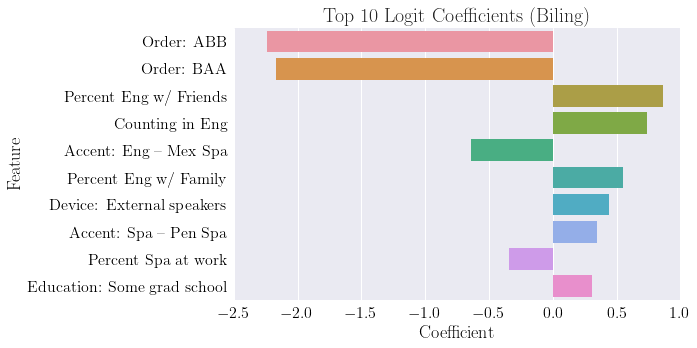

In [19]:
## plot the top 10 coefficients for the bilingual data

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=plot_logit_data)

ax.set_xlim(-2.5,1)

plt.title("Top 10 Logit Coefficients (Biling)", fontsize=20)
plt.xlabel("Coefficient", fontsize=18)
plt.ylabel("Feature", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# save figure
# plt.savefig('images/biling_coef.pdf', bbox_inches='tight', dpi=300)  # uncomment to save plot

plt.show(ax)

#### Validation Predictions

In [20]:
def cf_matrix_plot(y_val, logit_pred):
    
    '''
    This function takes as arguments the dependent variable list in the validation set (ie, y_validate) and the 
    best logistic predictions for the independent variables in the X_validate set (ie, X_validate) and creates 
    a confusion matrix (a plot that measures the accuracy of the trained model for incorrect and correct
    responses).
    '''
    
    cf_matrix = confusion_matrix(y_val, logit_pred, normalize = "true")

    df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

    df_cm = df_cm.rename(index=str, columns={0: "Incorrect", 1: "Correct"})
    df_cm.index = ["Incorrect", "Correct"]
    
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return

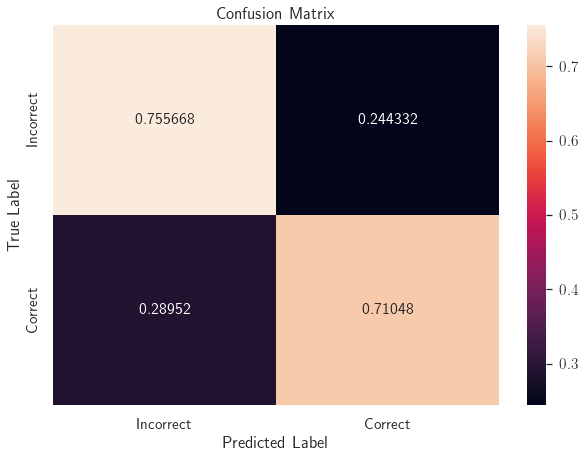

In [21]:
## create validation predictions confusion matrix

# execute the confusion matrix function on validation predictions and labels
cf_matrix_plot(y_validate, best_logit_pred)

In [22]:
def error_values(label, prediction):
    
    '''
    This function takes the y_validate set from splitting the data and the y_prediction set returned from the 
    logistic regression algorithm, and it generates the values for the Precision, Recall, and F1 Score, which
    indicate the error values of the model's predictions. For more information, see:
    
        Precision and Recall: https://en.wikipedia.org/wiki/Precision_and_recall
        F1 score: https://en.wikipedia.org/wiki/F-score
    '''
    
    label = label.to_numpy()
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for i in range(len(prediction)): 
        if label[i]==prediction[i]==1:
           TP += 1
        if prediction[i]==1 and label[i]!=prediction[i]:
           FP += 1
        if label[i]==prediction[i]==0:
           TN += 1
        if prediction[i]==0 and prediction[i]!=label[i]:
           FN += 1
    
    precision = TP/(TP + FP)
    print("Precision:", precision)
    
    recall = TP/(TP + FN)
    print("Recall:", recall)

    f1 = 2 * (precision * recall)/(precision + recall)
    print("F1 Score:", f1)

    return

In [23]:
## obtain validation predictions error values

# execute the error values function on validation data sets (true labels and predictions)
error_values(y_validate, val_pred)

Precision: 0.8048289738430584
Recall: 0.7104795737122558
F1 Score: 0.7547169811320756


#### Test Predictions

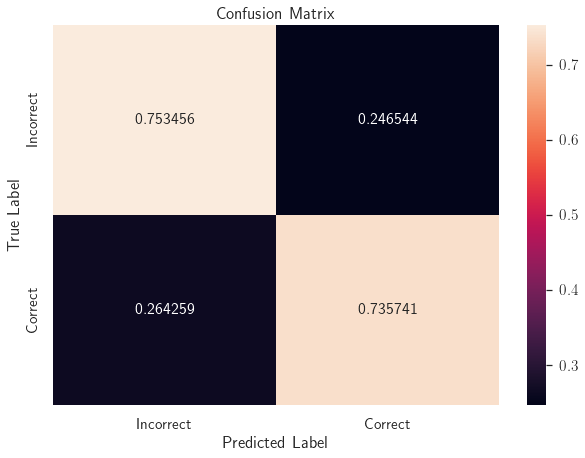

In [24]:
## create test predictions confusion matrix

# execute the confusion matrix function on test predictions and labels
cf_matrix_plot(y_test, test_pred)

In [25]:
## obtain test predictions error values

# execute the error values function on test data sets (true labels and predictions)
error_values(y_test, test_pred)

Precision: 0.7834008097165992
Recall: 0.7357414448669202
F1 Score: 0.7588235294117647


## Monolingual Data Processing

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # create plots with computer modern font style
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [27]:
## open the (previously cleaned) monolingual data

# the following data sets contain 2400 (spanish) and 2448 (english) rows, one for each response to the critical 
# stimuli (48 total) by all 50 spanish monolingual and 51 english monolingual participants.

# spanish data
df_spa = pd.read_csv('data/spanish_monolingual.csv')  # upload spanish data set

# english data
df_eng = pd.read_csv('data/english_monolingual.csv')  # upload english data set


# merge and process monolingual dataframes
df_monolingual = pd.concat([df_spa, df_eng], axis=0)
df_monolingual.fillna("", inplace=True)  # replace blank cells with an empty string
df_monolingual['accents_coded']=df_monolingual['accents_coded'].str.split(',')  # split accent codes into a list

# display the dataframe
display(df_monolingual)

,subject,type,education,accents_coded,device,trial,response
0,S01,spanish,Less than high school,"[spa_accented_am_eng, eng_accented_mex_spa]",Middle price earphones (e.g. those that come w...,ad_a_pps_cr,1 and 2
1,S02,spanish,"College (B.A., B.S.)","[spa_accented_am_eng, eng_accented_mex_spa, ...",Middle price earphones (e.g. those that come w...,ad_a_pps_cr,1 and 2
2,S03,spanish,"College (B.A., B.S.)","[spa_accented_am_eng, eng_accented_mex_spa]",High price earphones or headphones (e.g. noise...,ad_a_pps_cr,2 and 3
3,S04,spanish,Some college,[spa_accented_am_eng],High price earphones or headphones (e.g. noise...,ad_a_pps_cr,1 and 2
4,S05,spanish,Some college,"[spa_accented_am_eng, spa_accented_fre, eng_...",phone/tablet speakers,ad_a_pps_cr,1 and 2
...,...,...,...,...,...,...,...
2443,S47,english,Masters,[],Computer/laptop speakers,sld_a_aad_cr,1 and 2
2444,S48,english,Some graduate school,[],High price earphones or headphones (e.g. noise...,sld_a_aad_cr,1 and 2
2445,S49,english,"College (B.A., B.S.)",[spa_accented_cast_spa],High price earphones or headphones (e.g. noise...,sld_a_aad_cr,1 and 2
2446,S50,english,Some college,[eng_accented_mex_spa],Middle price earphones (e.g. those that come w...,sld_a_aad_cr,1 and 2


In [28]:
## create columns with trial info

# execute the trial info function on the monolingual dataframe
df_monolingual = df_monolingual.apply(lambda row: trial_info(row), axis=1)
display(df_monolingual)

,accents_coded,accuracy,answer,constant_gen,constant_spec,device,education,order,response,subject,trial,type,vowel
0,"[spa_accented_am_eng, eng_accented_mex_spa]",1,1 and 2,poa,ad,Middle price earphones (e.g. those that come w...,Less than high school,AAB,1 and 2,S01,ad_a_pps_cr,spanish,a
1,"[spa_accented_am_eng, eng_accented_mex_spa, ...",1,1 and 2,poa,ad,Middle price earphones (e.g. those that come w...,"College (B.A., B.S.)",AAB,1 and 2,S02,ad_a_pps_cr,spanish,a
2,"[spa_accented_am_eng, eng_accented_mex_spa]",0,1 and 2,poa,ad,High price earphones or headphones (e.g. noise...,"College (B.A., B.S.)",AAB,2 and 3,S03,ad_a_pps_cr,spanish,a
3,[spa_accented_am_eng],1,1 and 2,poa,ad,High price earphones or headphones (e.g. noise...,Some college,AAB,1 and 2,S04,ad_a_pps_cr,spanish,a
4,"[spa_accented_am_eng, spa_accented_fre, eng_...",1,1 and 2,poa,ad,phone/tablet speakers,Some college,AAB,1 and 2,S05,ad_a_pps_cr,spanish,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,[],1,1 and 2,vot,sld,Computer/laptop speakers,Masters,BBA,1 and 2,S47,sld_a_aad_cr,english,a
2444,[],1,1 and 2,vot,sld,High price earphones or headphones (e.g. noise...,Some graduate school,BBA,1 and 2,S48,sld_a_aad_cr,english,a
2445,[spa_accented_cast_spa],1,1 and 2,vot,sld,High price earphones or headphones (e.g. noise...,"College (B.A., B.S.)",BBA,1 and 2,S49,sld_a_aad_cr,english,a
2446,[eng_accented_mex_spa],1,1 and 2,vot,sld,Middle price earphones (e.g. those that come w...,Some college,BBA,1 and 2,S50,sld_a_aad_cr,english,a


In [29]:
## drop superfluous columns

# remove the columns 'trial', 'response', and 'answer' from the monolingual dataframe
df_monolingual.drop(['trial', 'response', 'answer'], axis=1, inplace=True)
display(df_monolingual)

,accents_coded,accuracy,constant_gen,constant_spec,device,education,order,subject,type,vowel
0,"[spa_accented_am_eng, eng_accented_mex_spa]",1,poa,ad,Middle price earphones (e.g. those that come w...,Less than high school,AAB,S01,spanish,a
1,"[spa_accented_am_eng, eng_accented_mex_spa, ...",1,poa,ad,Middle price earphones (e.g. those that come w...,"College (B.A., B.S.)",AAB,S02,spanish,a
2,"[spa_accented_am_eng, eng_accented_mex_spa]",0,poa,ad,High price earphones or headphones (e.g. noise...,"College (B.A., B.S.)",AAB,S03,spanish,a
3,[spa_accented_am_eng],1,poa,ad,High price earphones or headphones (e.g. noise...,Some college,AAB,S04,spanish,a
4,"[spa_accented_am_eng, spa_accented_fre, eng_...",1,poa,ad,phone/tablet speakers,Some college,AAB,S05,spanish,a
...,...,...,...,...,...,...,...,...,...,...
2443,[],1,vot,sld,Computer/laptop speakers,Masters,BBA,S47,english,a
2444,[],1,vot,sld,High price earphones or headphones (e.g. noise...,Some graduate school,BBA,S48,english,a
2445,[spa_accented_cast_spa],1,vot,sld,High price earphones or headphones (e.g. noise...,"College (B.A., B.S.)",BBA,S49,english,a
2446,[eng_accented_mex_spa],1,vot,sld,Middle price earphones (e.g. those that come w...,Some college,BBA,S50,english,a


In [30]:
## obtain and display accuracy totals out of 48 total stimuli for the spanish group and for individuals

df_spa_mono = df_monolingual.loc[df_monolingual['type'] == 'spanish']
spa_acc_dict = {}

for subject in df_spa_mono.subject.unique():
    subj_acc = df_spa_mono.loc[df_spa_mono['subject'] == subject, 'accuracy'].sum()
    spa_acc_dict.update({subject:subj_acc})

# print average accuracy for spanish monolingual participants
print('Spanish monolingual average accuracy:',round(df_spa_mono['accuracy'].mean()*100,2),'%')

# print accuracy for each individual participant
print('\nCorrect responses for each subject:\n')

for key, value in spa_acc_dict.items():
    print(key+':', value)

Spanish monolingual average accuracy: 61.38 %

Correct responses for each subject:

S01: 34
S02: 30
S03: 34
S04: 36
S05: 31
S06: 30
S07: 28
S08: 26
S09: 24
S10: 33
S11: 30
S12: 31
S13: 32
S14: 29
S15: 35
S16: 29
S17: 30
S18: 26
S19: 26
S20: 27
S21: 30
S22: 36
S23: 25
S24: 25
S25: 38
S26: 31
S27: 26
S28: 26
S29: 29
S30: 33
S31: 29
S32: 30
S33: 27
S34: 34
S35: 34
S36: 24
S37: 27
S38: 27
S39: 26
S40: 35
S41: 31
S42: 27
S43: 38
S44: 25
S45: 25
S46: 28
S47: 27
S48: 23
S49: 24
S50: 32


In [31]:
## obtain and display accuracy totals out of 48 total stimuli for the english group and for individuals

df_eng_mono = df_monolingual.loc[df_monolingual['type'] == 'english']
eng_acc_dict = {}

for subject in df_eng_mono.subject.unique():
    subj_acc = df_eng_mono.loc[df_eng_mono['subject'] == subject, 'accuracy'].sum()
    eng_acc_dict.update({subject:subj_acc})

# print average accuracy for english monolingual participants
print('English monolingual average accuracy:',round(df_eng_mono['accuracy'].mean()*100,2),'%')


# print accuracy for each individual participant
print('\nCorrect responses for each subject:\n')

for key, value in eng_acc_dict.items():
    print(key+':', value)

English monolingual average accuracy: 55.96 %

Correct responses for each subject:

S01: 28
S02: 26
S03: 31
S04: 23
S05: 23
S06: 32
S07: 30
S08: 22
S09: 30
S10: 30
S11: 24
S12: 22
S13: 28
S14: 24
S15: 28
S16: 29
S17: 29
S18: 25
S19: 29
S20: 28
S21: 25
S22: 27
S23: 28
S24: 23
S25: 15
S26: 27
S27: 28
S28: 27
S29: 24
S30: 33
S31: 31
S32: 25
S33: 24
S34: 21
S35: 24
S36: 25
S37: 21
S38: 30
S39: 20
S40: 28
S41: 29
S42: 28
S43: 33
S44: 30
S45: 29
S46: 29
S47: 29
S48: 32
S49: 25
S50: 25
S51: 34


In [32]:
## create dataframe with accuracy percentages for monolingual participants

spa_avg = pd.DataFrame(spa_acc_dict,index=['0']).T.reset_index()
spa_avg.rename(columns={'index': 'subject', '0': 'correct'}, inplace=True)
spa_avg['Language'] = 'Spanish'
spa_avg['Percent'] = round(spa_avg['correct']/48*100,2)

eng_avg = pd.DataFrame(eng_acc_dict,index=['0']).T.reset_index()
eng_avg.rename(columns={'index': 'subject', '0': 'correct'}, inplace=True)
eng_avg['Language'] = 'English'
eng_avg['Percent'] = round(eng_avg['correct']/48*100,2)

df_mono_percent = pd.concat([spa_avg,eng_avg], ignore_index=True)
df_mono_percent

,subject,correct,Language,Percent
0,S01,34,Spanish,70.83
1,S02,30,Spanish,62.50
2,S03,34,Spanish,70.83
3,S04,36,Spanish,75.00
4,S05,31,Spanish,64.58
...,...,...,...,...
96,S47,29,English,60.42
97,S48,32,English,66.67
98,S49,25,English,52.08
99,S50,25,English,52.08


minimum: 31.25
maximum: 79.17
subjects below chance: 10


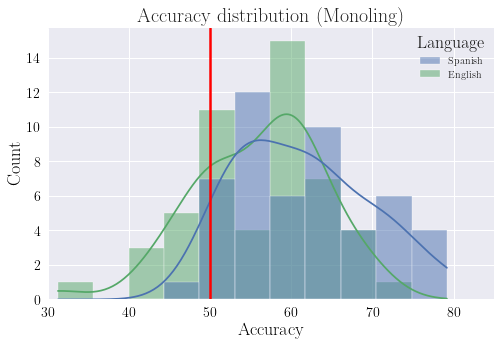

In [33]:
## plot distribution of accuracy data for monolingual participants

mono_acc_list = df_mono_percent['Percent']

print("minimum:", min(mono_acc_list))
print("maximum:", max(mono_acc_list))
print("subjects below chance:", len([prcnt for prcnt in mono_acc_list if prcnt < 50]))

# plot
fig, ax = plt.subplots(figsize=(8,5))

sns.color_palette('muted')
sns.histplot(data= df_mono_percent, x='Percent', hue='Language', kde = True)

ax.set_xlim(30,85)

plt.axvline(50, color = "red", lw=2.5)
plt.title("Accuracy distribution (Monoling)", fontsize=20)
plt.xlabel("Accuracy", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)

# save figure
# plt.savefig('images/monoling_acc.pdf', dpi=300)  # uncomment to save plot

plt.show(ax)

## Monolingual Analysis

#### Monolingual Data Preparation

In [34]:
## split data

# create y series (ie, label or dependent variable) and X dataframe (ie, independent variables)
y = df_monolingual['accuracy']
X = df_monolingual.drop(['accuracy'], axis=1)  # drop the dependent variable from dataframe

# get dummies for categorical variables
X = pd.get_dummies(X, drop_first=True, columns=['constant_gen',
                                                'constant_spec',
                                                'education',
                                                'order',
                                                'vowel',
                                                'device', 
                                                'type'])

# create new dataframe and get dummies for the list of coded accents
accent_codes = pd.get_dummies(X['accents_coded'].apply(pd.Series).stack(), drop_first=True).groupby(level=0).sum()

# join both independent variable dataframes and drop the superfluous 'accents_coded' column
X = X.join(accent_codes)
X.drop('accents_coded', axis=1, inplace=True)

# display the dimensions of the final independent variable dataframe (rows, columns)
X.shape

(4848, 41)

In [35]:
## split X and y into training (60%), validation (20%), and test (20%) data

# set a random seed
np.random.seed(123)

# split data sets into training (80% total) and test (20% total) data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20, 
                                                    stratify=X[['subject']])  # split subjects evenly

# split training sets into training (60% total) and validation (20% total) data
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = X_train[['subject']])  # split subjects evenly

In [36]:
# ## drop subject column

# # remove subject column from all independent variable sets
X_train.drop(['subject'], axis=1, inplace=True)
X_validate.drop(['subject'], axis=1, inplace=True)
X_test.drop(['subject'], axis=1, inplace=True)

In [37]:
## data set distributions

# display distribution for each data set (rows, columns)
print('Training data:', X_train.shape)
print('Validation data:', X_validate.shape)
print('Test data:', X_test.shape)

Training data: (2908, 40)
Validation data: (970, 40)
Test data: (970, 40)


#### Monolingual Data Analysis

Because the bilingual and monolingual data sets contain a distinct number and type of variables, a new statistical model needed to be trained in order to identify the new relevant features in the new data set. The hyperparameter tuning step was repeated as well.

In [38]:
## identify the statistical model

# select a logistic regression as the statistical algorithm
logit_reg = LogisticRegression()

#train the logistic algorithm on the training data
logit_model = logit_reg.fit(X_train, y_train)

In [39]:
## hyperparameter tuning

# penalty = regularization method of penalizing model complexity
# max_iter = iterations needed to reach convergence
# C = weight assigned to training data vs penalty
# solver = algorithm type

# identify the parameter ranges/options to test
param_grid = {'penalty': ['l1', 'l2'],
              'max_iter': [25,50,100],
              'C': np.arange(.1, 1, .1),
              'solver': ['liblinear', 'saga']}

# train model and identify the best parameter settings on training sets
logit_grid = GridSearchCV(logit_model, param_grid, cv=3)
logit_grid.fit(X_train, y_train)

# obtain the best parameters and the predictions on the validation set
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print the best parameters and validation accuracy with said parameters
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy:', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'max_iter': 25, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy: 0.6061855670103092


In [40]:
## train the model with the best parameter settings identified in the hyperparameter tuning step

# build the logistic model with the best parameters identified
logit_reg = LogisticRegression(penalty='l1', C=0.1, max_iter=25, solver='liblinear')

# train the model on the training sets
logit_model = logit_reg.fit(X_train, y_train)

# obtain the predictions for the validation data
val_pred = logit_model.predict(X_validate)

# obtain the predictions for the test data
test_pred = logit_grid.predict(X_test)

In [41]:
## model results

# obtain results for the logistic model on the training data sets
logit_data = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['orig_feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

In [42]:
## obtain the top 10 coefficients (ie, relevant variables) identified by the model

plot_logit_data = logit_data.nlargest(10, 'abs_coef')

# provide legible names for variables
plot_logit_data['Feature'] = ['Vowel: /u/', 'Constant: Dental', 'Constant: Short lag', 'Order: BAA', 
                              'Vowel: /i/', 'Device: Phone or tablet', 'Speaker: Spanish', 
                              'Device: Mid-price earphones', 'Order: ABB', 'Education: Some college']

display(plot_logit_data)

,orig_feature,Coefficient,abs_coef,Feature
13,vowel_u,0.238254,0.238254,Vowel: /u/
1,constant_spec_dd,0.181975,0.181975,Constant: Dental
2,constant_spec_sld,0.181722,0.181722,Constant: Short lag
10,order_BAA,0.101559,0.101559,Order: BAA
12,vowel_i,0.096076,0.096076,Vowel: /i/
19,device_phone/tablet speakers,0.065203,0.065203,Device: Phone or tablet
20,type_spanish,0.059184,0.059184,Speaker: Spanish
17,device_Middle price earphones (e.g. those that...,0.040709,0.040709,Device: Mid-price earphones
9,order_ABB,-0.022846,0.022846,Order: ABB
7,education_Some college,0.021740,0.021740,Education: Some college


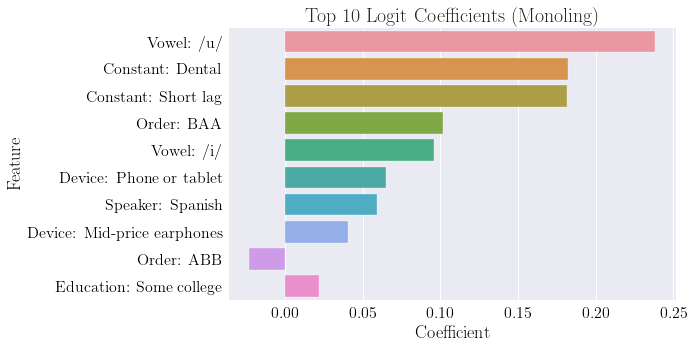

In [43]:
## plot the top 10 coefficients for the monolingual data

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=plot_logit_data)

plt.title("Top 10 Logit Coefficients (Monoling)", fontsize=20)
plt.xlabel("Coefficient", fontsize=18)
plt.ylabel("Feature", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# save figure
# plt.savefig('images/monoling_coef_1.pdf', bbox_inches='tight', dpi=300)  # uncomment to save plot

plt.show(ax)

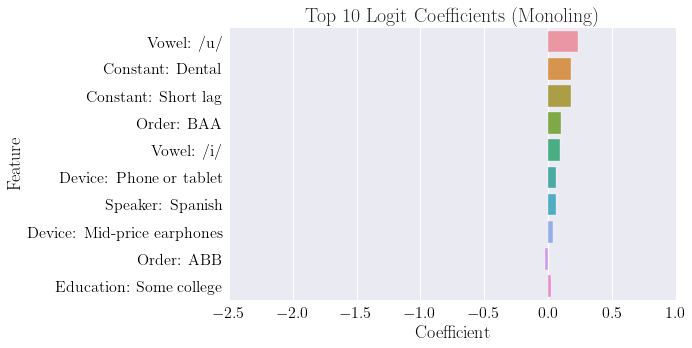

In [44]:
## plot the top 10 coefficients for the monolingual data (x-axis consistency)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=plot_logit_data)

ax.set_xlim(-2.5,1)

plt.title("Top 10 Logit Coefficients (Monoling)", fontsize=20)
plt.xlabel("Coefficient", fontsize=18)
plt.ylabel("Feature", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# save figure
# plt.savefig('images/monoling_coef_2.pdf', bbox_inches='tight', dpi=300)  # uncomment to save plot

plt.show(ax)

#### Validation Predictions

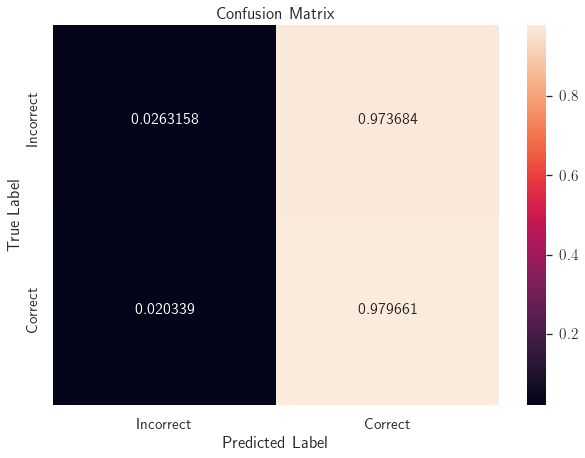

In [45]:
## create validation predictions confusion matrix

# execute the confusion matrix function on validation predictions and labels
cf_matrix_plot(y_validate, best_logit_pred)

In [46]:
## obtain validation predictions error values

# execute the error values function on validation data sets (true labels and predictions)
error_values(y_validate, val_pred)

Precision: 0.609704641350211
Recall: 0.9796610169491525
F1 Score: 0.7516254876462939


#### Test Predictions

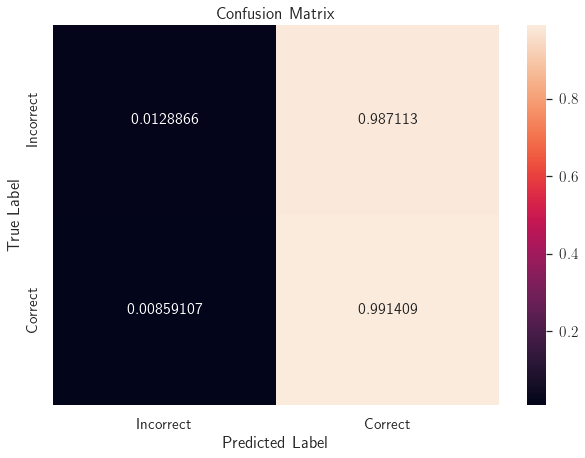

In [47]:
## create test predictions confusion matrix

# execute the confusion matrix function on test predictions and labels
cf_matrix_plot(y_test, test_pred)

In [48]:
## obtain test predictions error values

# execute the error values function on test data sets (true labels and predictions)
error_values(y_test, test_pred)

Precision: 0.6010416666666667
Recall: 0.9914089347079038
F1 Score: 0.748378728923476
